In [ ]:
'''
iDtech AI & ML Final Project
Code by: Joey O'Neill
06/09/2022
'''

"\niDtech AI & ML Final Project\nCode by: Joey O'Neill\n06/09/2022\n"

In [ ]:
# Needed Imports
import glob
from google.colab import drive

import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib.image as img
from matplotlib import pyplot

import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K

%matplotlib inline

In [ ]:
# MAY OR MAY NOT NEED TO MOUNT DRIVE
# WE WILL SEE TOMORROW :P

# Loading in putin file names
putin_files = glob.glob("/content/myImageDataset/putin/*.jpg")
print("Number of files: {}".format(len(putin_files)))

# Loading in zelensk file name
zelensk_files = glob.glob("/content/myImageDataset/zelensky/*.jpg")
print("Number of files: {}".format(len(zelensk_files)))

Number of files: 5
Number of files: 5


In [ ]:
# concat the files
dataset = putin_files + zelensk_files

# create labels for the files
data_labels = []

# append to labels
# putin = 0
for i in range(len(putin_files)):
  data_labels.append(0)

# zelensky = 1
for i in range(len(zelensk_files)):
  data_labels.append(1)

# print labels to confirm
print(data_labels)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [ ]:
# Train test splitting the data
X_train, X_test, y_train, y_test = train_test_split(dataset, data_labels, test_size=0.2, random_state=42)

# Print to confirm not empty
print("X_train: " + str(X_train))
print("X_train length: " + str(len(X_train)))
print("y_train: " + str(y_train) + '\n')

# Print to confirm not empty
print("X_test: " + str(X_test))
print("X_test length: " + str(len(X_test)))
print("y_test: " + str(y_test))

X_train: ['/content/myImageDataset/zelensky/z5.jpg', '/content/myImageDataset/putin/putin3.jpg', '/content/myImageDataset/zelensky/z1.jpg', '/content/myImageDataset/putin/putin5.jpg', '/content/myImageDataset/zelensky/z4.jpg', '/content/myImageDataset/putin/putin4.jpg', '/content/myImageDataset/putin/putin1.jpg', '/content/myImageDataset/zelensky/z2.jpg']
X_train length: 8
y_train: [1, 0, 1, 0, 1, 0, 0, 1]

X_test: ['/content/myImageDataset/zelensky/z3.jpg', '/content/myImageDataset/putin/putin2.jpg']
X_test length: 2
y_test: [1, 0]


In [ ]:
# Initialize train & test datasets
train_data = []
test_data = []

# Appends picture matrix representations for train data
for file in X_train:
  pic = image.imread(file)
  train_data.append(pic)

# Appends picture matrix representations for test data
for file in X_test:
  pic = image.imread(file)
  test_data.append(pic)

print("train_data length: " + str(len(train_data)))
print("train_data[0].shape: " + str(train_data[0].shape))
print(str(y_train)+"\n")

print("test_data length: " + str(len(test_data)))
print(y_test)

train_data length: 8
train_data[0].shape: (500, 500, 3)
[1, 0, 1, 0, 1, 0, 0, 1]

test_data length: 2
[1, 0]


In [ ]:
# Cast datasets as np arrays
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

# Cast label arrays as np arrays
train_labels = np.asarray(y_train)
test_labels = np.asarray(y_test)

# Print to confirm conversion
print("train_data: " + str(train_data.shape) + " " + str(type(train_data)))
print("test_data: " + str(test_data.shape) + " " + str(type(test_data)))
print("train_labels: " + str(train_labels.shape) + " " + str(type(train_labels)))
print("test_lables: " + str(test_labels.shape) + " " + str(type(test_labels)))

train_data: (8, 500, 500, 3) <class 'numpy.ndarray'>
test_data: (2, 500, 500, 3) <class 'numpy.ndarray'>
train_labels: (8,) <class 'numpy.ndarray'>
test_lables: (2,) <class 'numpy.ndarray'>


In [ ]:
# Reformat the data to float32
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [ ]:
# Normalize the values by dividing by 255
train_data /= 255
test_data /= 255

In [ ]:
# Convert the labels using one-hot encoding 
num_classes = 2
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

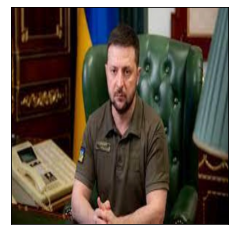

In [ ]:
# Plot Image Function From iDtech gameplan
def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

# First image of test set plotted
plot_image(test_data, 0, test_labels)

In [ ]:
# Initialization of variables needed for model creation and testing
epochs = 5
batch_size = 2
img_rows = 500
img_cols = 500

input_shape = (img_rows, img_cols, 3, 1)

In [ ]:
# SIMPLE 1-LAYER 2D-CNN

# Model Initialization
model = Sequential() 

# Model Layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(units=2,activation='softmax'))

# Prints a summary table of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 498, 1, 64)   640       
                                                                 
 flatten (Flatten)           (None, 15936000)          0         
                                                                 
 dense (Dense)               (None, 32)                509952032 
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 509,952,738
Trainable params: 509,952,738
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model Compilation
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam', 
              metrics=['accuracy']) 

In [ ]:
# Model Training (Fitting)
model.fit(train_data, train_labels,
           batch_size=batch_size,
           epochs=epochs,
           validation_data=(test_data, test_labels),
           shuffle=True) 

Epoch 1/5
4/4 [==============================] - 28s 7s/step - loss: 233.9545 - accuracy: 0.3750 - val_loss: 58.3281 - val_accuracy: 0.5000
Epoch 2/5
4/4 [==============================] - 23s 6s/step - loss: 66.3679 - accuracy: 0.5000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 3/5
4/4 [==============================] - 24s 6s/step - loss: 0.6687 - accuracy: 0.8750 - val_loss: 71.2650 - val_accuracy: 0.5000
Epoch 4/5
4/4 [==============================] - 25s 7s/step - loss: 19.3063 - accuracy: 0.7500 - val_loss: 36.5036 - val_accuracy: 0.5000
Epoch 5/5
4/4 [==============================] - 24s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 18.9748 - val_accuracy: 0.5000


In [ ]:
# Model Evaluation
scores = model.evaluate(test_data, test_labels,verbose=0) 
print('Test accuracy:', scores[1])

Test accuracy: 0.5
